In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/agricultural_yield.csv')
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
X = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule',]]
y = df['Yield_kg_per_hectare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 531642.6250 - mae: 701.6269 - val_loss: 556851.3750 - val_mae: 719.5793
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516462.0312 - mae: 690.8423 - val_loss: 495908.7500 - val_mae: 677.6053
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 433022.5312 - mae: 629.3832 - val_loss: 341454.5625 - val_mae: 560.6110
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276834.0625 - mae: 501.1990 - val_loss: 144526.9062 - val_mae: 361.9050
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103217.5781 - mae: 300.1885 - val_loss: 31902.3750 - val_mae: 158.6975
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22376.6484 - mae: 127.5473 - val_loss: 11712.7061 - val_mae: 87.4366
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11084.2803 - mae: 85.1503 - val_loss: 10053.5586 - val_mae: 79.9017
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10626.3721 - mae: 82.0434 - val_loss: 94

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose = 1)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2963.8267 - mae: 44.0349 
Test Loss: 2746.273193359375, Test MAE: 41.93936538696289


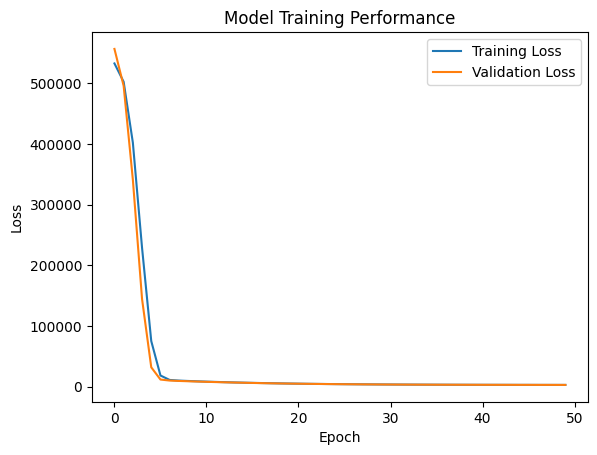

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-22-8b0d065609f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-22-8b0d065609f1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


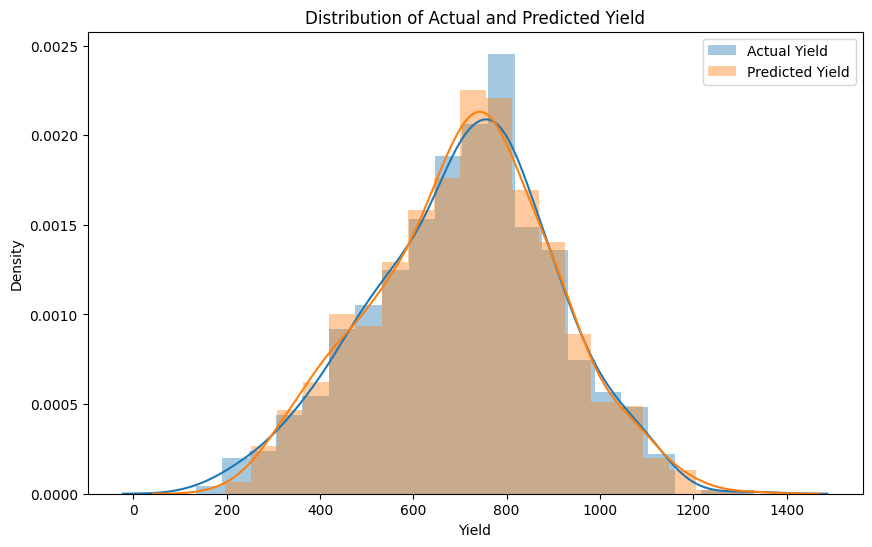

In [ ]:
# Distribution plots
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ 457.19775],
       [ 675.17834],
       [1092.2001 ],
       [ 671.33966],
       [ 821.9397 ],
       [1008.4984 ],
       [ 316.93008],
       [ 581.24   ],
       [ 430.64877],
       [ 799.2641 ],
       [ 618.95374],
       [ 671.0378 ],
       [ 635.81476],
       [ 734.06964],
       [ 846.9462 ],
       [ 677.0127 ],
       [ 971.7815 ],
       [ 478.64084],
       [ 583.73596],
       [ 377.7568 ],
       [ 783.5438 ],
       [ 809.62634],
       [ 378.58426],
       [ 826.29926],
       [1021.1898 ],
       [ 587.9062 ],
       [ 647.5194 ],
       [ 975.1717 ],
       [ 616.89795],
       [ 633.2751 ],
       [ 677.6602 ],
       [ 802.36334],
       [ 824.5142 ],
       [ 794.6226 ],
       [ 537.36395],
       [ 709.3161 ],
       [ 704.6888 ],
       [1023.0812 ],
       [ 242.94173],
       [ 646.5871 ],
       [ 937.36273],
       [ 899.5371 ],
       [ 773.78876],
       [ 774.6079 ],
       [ 633.7993 ],
       [ 841.2996 ],
       [ 635.6459 ],
       [ 578.

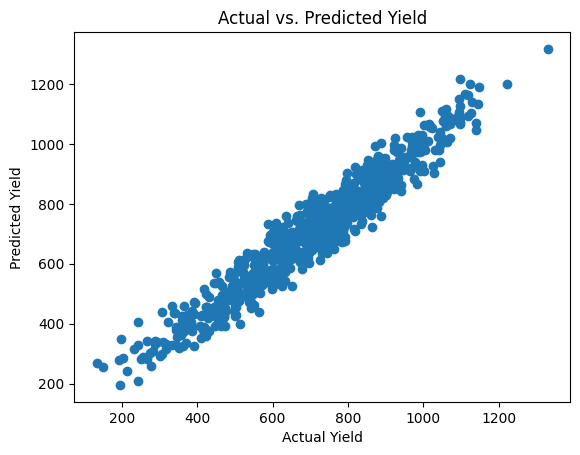

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield')
plt.show()